<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="ITM">
</head>

<img src="https://maua.br/images/selo-60-anos-maua.svg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


# Lab: Distribuições e Testes de Hipóteses

Referências e Materiais úteis para este Lab:

[Prático de Distribuições e Testes de Hipóteses](https://colab.research.google.com/github/Rogerio-mack/IMT_Ciencia_de_Dados/blob/main/Practical_Distributions_HTests.ipynb)

---





In [1]:
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.rcParams['figure.figsize'] = (5, 3)

# Exemplo

O exemplo a seguir constrói um gráfico da Função `PPF` para uma distribuição normal.

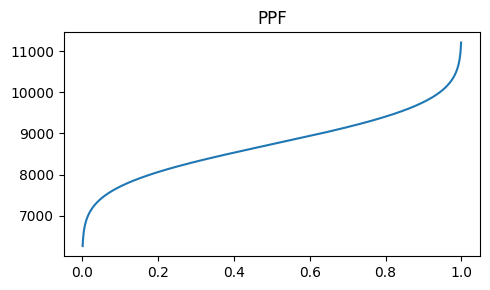

In [2]:
from scipy.stats import norm

mu = 8735
sigma = 800
prob = np.linspace(0,1,1000)

ppf = norm.ppf(prob,loc=mu,scale=sigma) 

fig, ax = plt.subplots()

sns.lineplot(x=prob,y=ppf,ax=ax)
ax.set_title('PPF')

plt.tight_layout()
plt.show()

# Exercícios

E1. O salário médio de cientistas de dados no Brasil é hoje (2023) de R\$ 8735 com um desvio padrão de R\$ 800. Considerando uma distribuição normal, faça os gráficos de PDF, CDF e PPF dessa distribuição (empregue o exemplo anterior como modelo para contruir os gráficos).

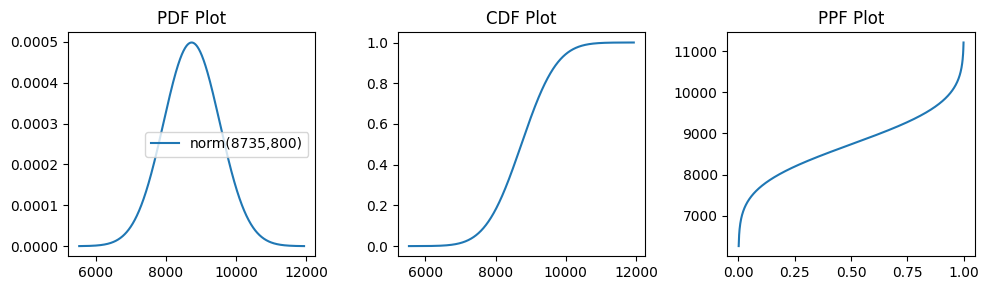

In [9]:
# seu código
fig, ax = plt.subplots(1,3,figsize=(10,3))

mu = 8735
sigma = 800
values_norm = []
points = np.linspace(mu - 4*sigma, mu + 4*sigma,1000)
# ----------
for v in points:
    values_norm.append(norm.pdf(v,loc=mu,scale=sigma))

values_norm = np.array(values_norm)

sns.lineplot(x=points, y=values_norm, ax=ax[0], label='norm(' + str(mu) + ',' + str(sigma) + ')')
ax[0].set_title('PDF Plot')
ax[0].legend()
# ----------
values_cdf = []

for v in points:
    values_cdf.append(norm.cdf(v,loc=mu,scale=sigma))

values_cdf = np.array(values_cdf)

sns.lineplot(x=points, y=values_cdf,ax=ax[1])
ax[1].set_title('CDF Plot')
# ----------
prob = np.linspace(0,1,1000)
values_ppf = norm.ppf(prob,loc=mu,scale=sigma)

values_ppf = np.array(values_ppf)

sns.lineplot(x=prob, y=values_ppf,ax=ax[2])
ax[2].set_title('PPF Plot')

plt.tight_layout()
plt.show()

Q1. O salário médio de cientistas de dados no Brasil é hoje (2023) de R\$ 8735 $\pm$ 800. Sua empresa está oferecendo uma vaga pagando R\$ 9500. Você pretende entrevistar 10 candidatos. Considerando uma distribuição normal dos salários no mercado, quantos desses candidatos provavelmente terão um salário acima do valor oferecido pela empresa.

In [11]:
# seu código
1 - norm.cdf(9500, loc = mu, scale = sigma)

0.16947297216771973

Q2. Qual o intervalo de salários em torno da média que abrange 90% dos candidatos a uma vaga de cientista de dados? Calcule empregando a função `interval()` e empregando uma das demais funções de `norm`(`pdf`, `cdf` ou `ppf`).

In [13]:
# seu código
norm.interval(0.90, loc = mu, scale = sigma)

(7419.117098438822, 10050.882901561177)

In [15]:
print(f"({norm.ppf(0.05, loc = mu,scale = sigma)}, {norm.ppf(0.95, loc = mu,scale = sigma)})")

(7419.117098438822, 10050.882901561177)


Q3. Considere o seguinte conjunto de 10000 valores de renda do Brasil em 2023. Faça um gráfico de distribuição (PDF) e os qq-plots comparando esses dados com uma distribuição normal e uma lognormal. Empregue os valores de média e desvio padrão dessa série de dados e o parâmetro `s` $=0.954$ para a distribuição lognormal.

In [16]:
df = pd.read_csv('https://github.com/Rogerio-mack/IMT_Ciencia_de_Dados/raw/main/data/BR_income.csv')
df.head()

,income
0,4501.397086
1,3048.257175
2,3064.464535
3,2978.753179
4,3652.136710


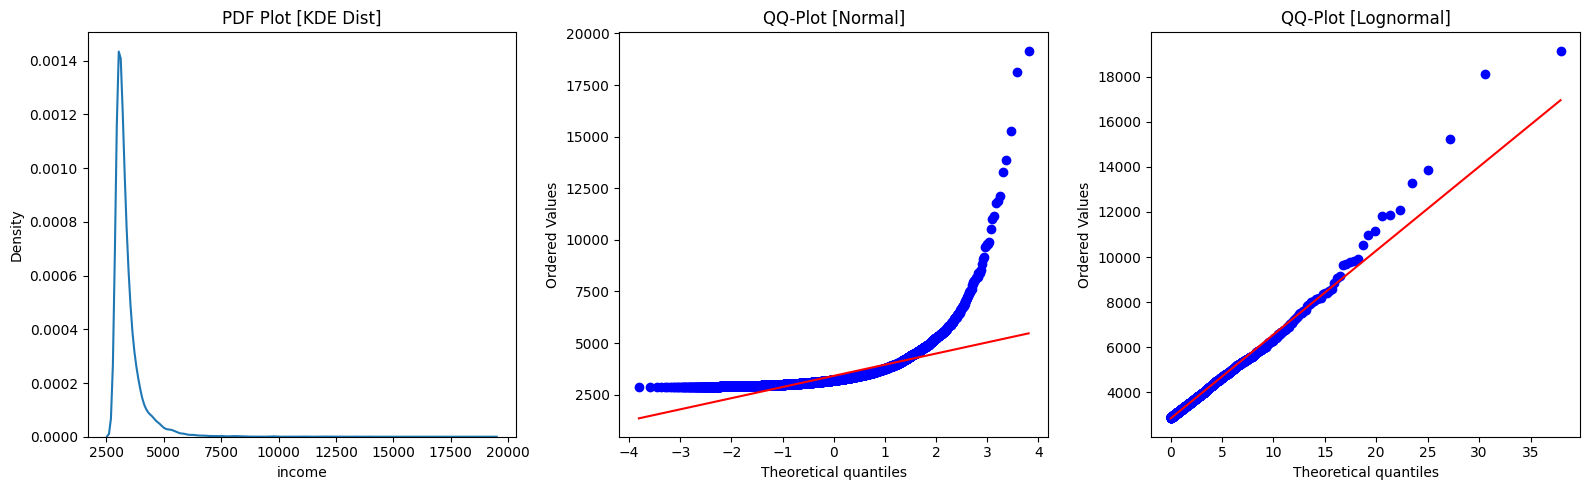

In [29]:
# seu código
from scipy.stats import probplot

mu = df.income.mean()
sigma = df.income.std()

fig, ax = plt.subplots(1,3,figsize=(16,5))

sns.kdeplot(data = df, x = 'income',ax=ax[0])
ax[0].set_title('PDF Plot [KDE Dist]')

probplot(df.income, dist = 'norm', fit = True, plot = ax[1])
ax[1].set_title('QQ-Plot [Normal]')

probplot(df.income, dist = stats.lognorm(0.954), fit = True, plot = ax[2])
ax[2].set_title('QQ-Plot [Lognormal]')

plt.tight_layout()
plt.show()

**Atenção: Esse é um exemplo fictício e a renda do brasileiro não segue uma lognormal! Apenas vamos assumir que sim para para o exercício!**

Q4. Empregue a distribuição mais adequada que você identificou acima para saber o percentual de brasileiros que seriam beneficiados com um abono de até 3 salários mínimos (hoje, R\$ 1320).

In [32]:
from scipy.stats import lognorm

lognorm.cdf(3*1320, loc = mu, scale = sigma, s = 0.954)

0.3923616383867491

Q5. Uma nova alíquota de imposto deve incidir sobre os 20% mais ricos. Qual é o valor de renda mínimo que esse novo imposto atingiria?

In [33]:
lognorm.ppf(0.80, loc = mu, scale = sigma, s = 0.954)

4998.830236121592

# Caso: **Penguins**

Considere o seguinte conjunto de dados `penguins`.

In [36]:
df = sns.load_dataset('penguins')
df = df.dropna()
df.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


Q6. Você quer aplicar um teste de hipótese para saber se o peso dos pinguins machos é significativamente diferente dos pinguins fêmea. Faça um boxplot do peso de machos e fêmeas e o gráfico de distribuição desses valores, também para machos e fêmeas. Você pode aplicar um teste de hipóteses t-student?

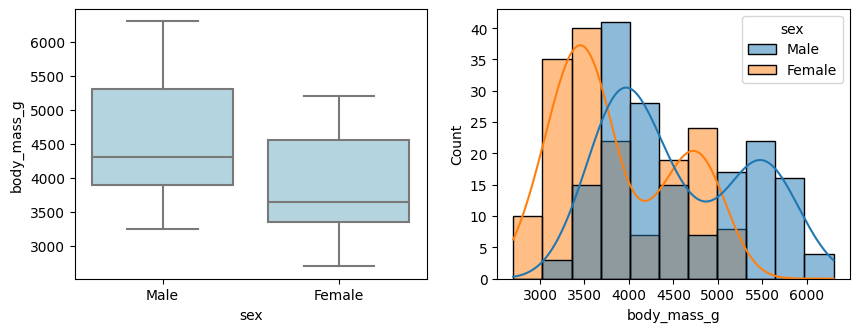

In [40]:
# seu código
fig, ax = plt.subplots(1,2,figsize=(10,3.5))

col = 'body_mass_g'
sns.boxplot(data=df,x='sex',y=col,color='lightblue',ax=ax[0])
sns.histplot(data=df,x=col,hue='sex',kde=True,ax=ax[1])

plt.show()

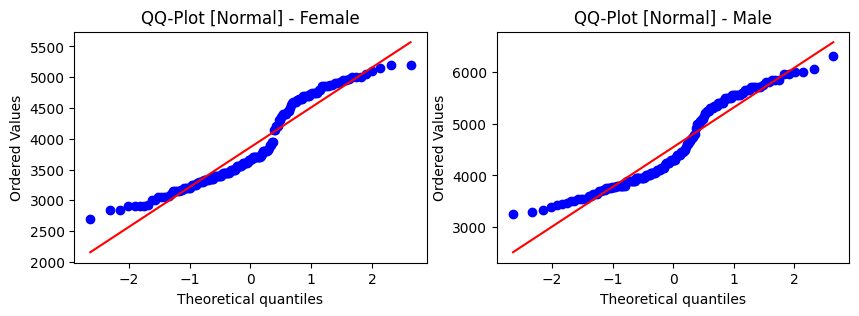

In [44]:
fig, ax = plt.subplots(1,2,figsize=(10,3))

probplot(df[df.sex == 'Female']['body_mass_g'], dist = 'norm', fit = True, plot = ax[0])
ax[0].set_title('QQ-Plot [Normal] - Female')

probplot(df[df.sex == 'Male']['body_mass_g'], dist = 'norm', fit = True, plot = ax[1])
ax[1].set_title('QQ-Plot [Normal] - Male')

plt.show()

In [46]:
print("Female:", stats.shapiro(df[df.sex == 'Female']['body_mass_g']).pvalue > 0.05)
print("Male:", stats.shapiro(df[df.sex == 'Male']['body_mass_g']).pvalue > 0.05)

Female: False
Male: False


Q7. Faça agora os mesmo gráficos, mas considerando o peso por `specie` e não por sexo. O que você conclui?

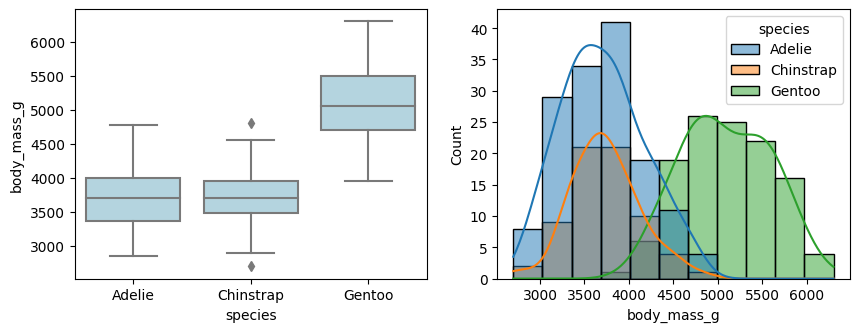

In [50]:
# seu código
fig, ax = plt.subplots(1,2,figsize=(10,3.5))

col = 'body_mass_g'
sns.boxplot(data=df,x='species',y=col,color='lightblue',ax=ax[0])
sns.histplot(data=df,x=col,hue='species',kde=True,ax=ax[1])

plt.show()

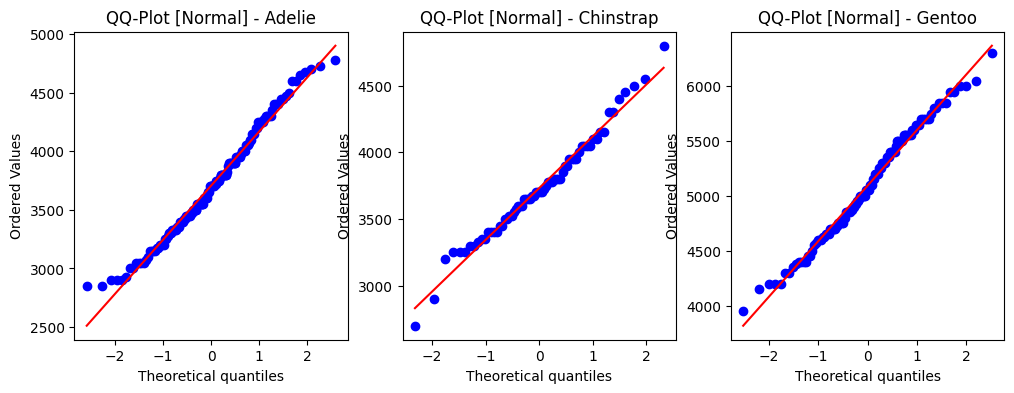

In [52]:
fig, ax = plt.subplots(1,3,figsize=(12,4))

probplot(df[df.species == 'Adelie']['body_mass_g'], dist = 'norm', fit = True, plot = ax[0])
ax[0].set_title('QQ-Plot [Normal] - Adelie')

probplot(df[df.species == 'Chinstrap']['body_mass_g'], dist = 'norm', fit = True, plot = ax[1])
ax[1].set_title('QQ-Plot [Normal] - Chinstrap')

probplot(df[df.species == 'Gentoo']['body_mass_g'], dist = 'norm', fit = True, plot = ax[2])
ax[2].set_title('QQ-Plot [Normal] - Gentoo')

plt.show()

In [58]:
print("Adelie:", stats.shapiro(df[df.species == 'Adelie']['body_mass_g']))
print("Adelie:", stats.shapiro(df[df.species == 'Chinstrap']['body_mass_g']))
print("Adelie:", stats.shapiro(df[df.species == 'Gentoo']['body_mass_g']))

Adelie: ShapiroResult(statistic=0.9811608195304871, pvalue=0.0423225462436676)
Adelie: ShapiroResult(statistic=0.9844939112663269, pvalue=0.5605177283287048)
Adelie: ShapiroResult(statistic=0.9860613346099854, pvalue=0.2605295777320862)


Q8. Você pode fazer agora um teste de hipótese para saber se o peso dos pinguins machos é significativamente diferente dos pinguins fêmea somente para espécie Chinstrap? Qual o resultado?

In [60]:
# seu código
chinstrap = df[df.species == 'Chinstrap'].reset_index(drop = True)

stat, p = stats.ttest_ind(chinstrap[chinstrap.sex == 'Female']['body_mass_g'], chinstrap[chinstrap.sex == 'Male']['body_mass_g'])

if (p < 0.05):
  print("Rejeita H0",p)
else:
  print("Aceita H0",p)

Rejeita H0 2.043956471470739e-06


# Caso: **`Teste A/B` Udacity, Redução de Cancelamentos pela Alteração do Site**

O Teste A/B visa comparar a efetividade de um experimento ou mudança e tem grande aplicação desde testes clínicos a avaliações de e-commerce.

Vamos verificar de modo bastante resumido o caso real do site Udacity.

**Condição Inicial.** As páginas iniciais do curso Udacity têm duas opções: "iniciar teste gratuito" e "acessar materiais do curso". Clicar em "Iniciar avaliação gratuita" solicita que o usuário insira as informações do cartão de crédito, subseqüentemente, inscrevendo-as em uma avaliação gratuita de 14 dias do curso, após o que são cobradas automaticamente. Os usuários que clicarem em "acessar materiais do curso" poderão visualizar o conteúdo do curso, mas não receberão suporte de treinamento, certificado verificado ou feedback do projeto.

**Mudança.** A Udacity testou uma mudança na qual os usuários que clicaram em "iniciar a avaliação gratuita" eram questionados sobre quanto tempo estavam dispostos a dedicar ao curso. Os usuários que escolherem 5 ou mais horas por semana serão submetidos ao processo de check-out, como de costume. Para usuários que indicam menos de 5 horas por semana, uma mensagem seria exibida indicando a necessidade de um compromisso maior de tempo para permitir o sucesso no curso e sugerindo para eles acessarem o conteúdo gratuito. Nesse ponto, o aluno teria a opção de continuar se matriculando na avaliação gratuita ou acessar os materiais do curso gratuitamente.

**Objetivo.**  Aumentar a efetividade dos alunos inscritos no teste gratuíto permitindo a empresa focar seus esforços nesses alunos.

**Desenho do Experimento.**

> **Métricas**

>> Invariant Metrics (controle): number of cookies, number of clicks, click-through-probability

>> Evaluation Metrics (objetivo): gross conversion, net conversion

In [61]:
path = 'http://meusite.mackenzie.br/rogerio/TIC/udacity_ABTesting-master/data/'
df_control = pd.read_csv(path + "Control.csv")
df_experiment = pd.read_csv(path+ "Experiment.csv")

df_control.describe() 
df_experiment.describe()

df_control_notnull = df_control[pd.isnull(df_control.Enrollments) != True]
df_experiment_notnull = df_experiment[pd.isnull(df_control.Enrollments) != True]

df_SignTest = pd.merge(df_control_notnull,df_experiment_notnull,on="Date")
df_SignTest['GrossConversion_cont'] = df_SignTest.Enrollments_x/df_SignTest.Clicks_x
df_SignTest['GrossConversion_exp'] = df_SignTest.Enrollments_y/df_SignTest.Clicks_y
df_SignTest['NetConversion_cont'] = df_SignTest.Payments_x/df_SignTest.Clicks_x
df_SignTest['NetConversion_exp'] = df_SignTest.Payments_y/df_SignTest.Clicks_y

cols = ['Date','GrossConversion_cont','GrossConversion_exp','NetConversion_cont','NetConversion_exp']

df_SignTest = df_SignTest[cols]

display(df_SignTest.head())


,Date,GrossConversion_cont,GrossConversion_exp,NetConversion_cont,NetConversion_exp
0,"Sat, Oct 11",0.195051,0.153061,0.101892,0.049563
1,"Sun, Oct 12",0.188703,0.147771,0.089859,0.115924
2,"Mon, Oct 13",0.183718,0.164027,0.104510,0.089367
3,"Tue, Oct 14",0.186603,0.166868,0.125598,0.111245
4,"Wed, Oct 15",0.194743,0.168269,0.076464,0.112981


Q9. Aplique o t-test agora para as duas métricas de avaliação. Quais os resultados para essas duas métricas?

DICA: É um teste de duas amostras em que você emprega para cada métrica a variável _cont (controle) e a variável _exp (experimento)

Q10. Esses dados não estão aqui disponíveis, mas qual seria a utilidade de fazer teste nas métricas consideradas invariantes do experimento e qual o resultado desejado?

In [63]:
# seu código
stat, p = stats.ttest_ind(df_SignTest['GrossConversion_cont'], df_SignTest['GrossConversion_exp'])

if (p < 0.05):
  print("Rejeita H0",p)
else:
  print("Aceita H0",p)

Aceita H0 0.13080105104323278


In [64]:
stat, p = stats.ttest_ind(df_SignTest['NetConversion_cont'], df_SignTest['NetConversion_exp'])

if (p < 0.05):
  print("Rejeita H0",p)
else:
  print("Aceita H0",p)

Aceita H0 0.5927558614268024
